In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
#from intake import open_catalog
import cartopy.io.shapereader as shpreader
import mygrads as mg
#import Ngl
#import Nio
#import fiona
import matplotlib as mpl
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.feature import NaturalEarthFeature
from cartopy.feature import COASTLINE
from clim680_function import xyticks

In [2]:
f= '/project/xprecip/merra2_ncfiles/winds/winds_morelevels_mean_9-20-22/winds_computed/u_computed.nc'
u_wind=xr.open_dataset(f)
lon=u_wind['lon']
lat=u_wind['lat']
u_wind_vals=u_wind['U']

In [3]:
f= '/project/xprecip/merra2_ncfiles/winds/winds_morelevels_mean_9-20-22/winds_computed/v_computed.nc'
v_wind=xr.open_dataset(f)
v_wind_vals=v_wind['V']

In [4]:
u_wind_700=u_wind_vals.sel(lev=700)
v_wind_700=v_wind_vals.sel(lev=700)

In [5]:
u_wind_700

<xarray.DataArray 'U' (time: 62336, lat: 53, lon: 113)>
[373330304 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2022-08-31T18:00:00
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 48.5 49.0 49.5 50.0 50.5
    lev      float64 700.0
Attributes:
    standard_name:   eastward_wind
    long_name:       Eastward wind component
    units:           m/s
    fmissing_value:  1000000000000000.0
    vmax:            1000000000000000.0
    vmin:            -1000000000000000.0

In [7]:
v_wind_700

<xarray.DataArray 'V' (time: 62336, lat: 53, lon: 113)>
[373330304 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2022-08-31T18:00:00
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 48.5 49.0 49.5 50.0 50.5
    lev      float64 700.0
Attributes:
    standard_name:   northward_wind
    long_name:       Northward wind component
    units:           m/s
    fmissing_value:  1000000000000000.0
    vmax:            1000000000000000.0
    vmin:            -1000000000000000.0

In [14]:
u_wind_shorter=u_wind_700.loc['1980-01-01':'1980-12-31']

In [15]:
u_wind_shorter

<xarray.DataArray 'U' (time: 1464, lat: 53, lon: 113)>
[8767896 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 1980-12-31T18:00:00
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 48.5 49.0 49.5 50.0 50.5
    lev      float64 700.0
Attributes:
    standard_name:   eastward_wind
    long_name:       Eastward wind component
    units:           m/s
    fmissing_value:  1000000000000000.0
    vmax:            1000000000000000.0
    vmin:            -1000000000000000.0

In [16]:
import sys
np.set_printoptions(threshold=sys.maxsize)

In [13]:
print(u_wind_shorter['time'].values)

['1980-01-01T00:00:00.000000000' '1980-01-01T06:00:00.000000000'
 '1980-01-01T12:00:00.000000000' '1980-01-01T18:00:00.000000000'
 '1980-01-02T00:00:00.000000000' '1980-01-02T06:00:00.000000000'
 '1980-01-02T12:00:00.000000000' '1980-01-02T18:00:00.000000000'
 '1980-01-03T00:00:00.000000000' '1980-01-03T06:00:00.000000000'
 '1980-01-03T12:00:00.000000000' '1980-01-03T18:00:00.000000000'
 '1980-01-04T00:00:00.000000000' '1980-01-04T06:00:00.000000000'
 '1980-01-04T12:00:00.000000000' '1980-01-04T18:00:00.000000000'
 '1980-01-05T00:00:00.000000000' '1980-01-05T06:00:00.000000000'
 '1980-01-05T12:00:00.000000000' '1980-01-05T18:00:00.000000000'
 '1980-01-06T00:00:00.000000000' '1980-01-06T06:00:00.000000000'
 '1980-01-06T12:00:00.000000000' '1980-01-06T18:00:00.000000000'
 '1980-01-07T00:00:00.000000000' '1980-01-07T06:00:00.000000000'
 '1980-01-07T12:00:00.000000000' '1980-01-07T18:00:00.000000000'
 '1980-01-08T00:00:00.000000000' '1980-01-08T06:00:00.000000000'
 '1980-01-08T12:00:00.000

In [18]:
winter_selected_u_shorter=u_wind_shorter.isel(time=u_wind_shorter.time.dt.season.isin(['DJF']))
winter_selected_u_shorter

<xarray.DataArray 'U' (time: 364, lat: 53, lon: 113)>
[2179996 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 1980-12-31T18:00:00
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 48.5 49.0 49.5 50.0 50.5
    lev      float64 700.0
Attributes:
    standard_name:   eastward_wind
    long_name:       Eastward wind component
    units:           m/s
    fmissing_value:  1000000000000000.0
    vmax:            1000000000000000.0
    vmin:            -1000000000000000.0

In [19]:
winter_selected_u_shorter['time'].values

array(['1980-01-01T00:00:00.000000000', '1980-01-01T06:00:00.000000000',
       '1980-01-01T12:00:00.000000000', '1980-01-01T18:00:00.000000000',
       '1980-01-02T00:00:00.000000000', '1980-01-02T06:00:00.000000000',
       '1980-01-02T12:00:00.000000000', '1980-01-02T18:00:00.000000000',
       '1980-01-03T00:00:00.000000000', '1980-01-03T06:00:00.000000000',
       '1980-01-03T12:00:00.000000000', '1980-01-03T18:00:00.000000000',
       '1980-01-04T00:00:00.000000000', '1980-01-04T06:00:00.000000000',
       '1980-01-04T12:00:00.000000000', '1980-01-04T18:00:00.000000000',
       '1980-01-05T00:00:00.000000000', '1980-01-05T06:00:00.000000000',
       '1980-01-05T12:00:00.000000000', '1980-01-05T18:00:00.000000000',
       '1980-01-06T00:00:00.000000000', '1980-01-06T06:00:00.000000000',
       '1980-01-06T12:00:00.000000000', '1980-01-06T18:00:00.000000000',
       '1980-01-07T00:00:00.000000000', '1980-01-07T06:00:00.000000000',
       '1980-01-07T12:00:00.000000000', '1980-01-07

In [20]:
#downsample to 1 day
resampled=winter_selected_u_shorter.resample(time='1D').mean(dim='time')

In [21]:
resampled

<xarray.DataArray 'U' (time: 366, lat: 53, lon: 113)>
array([[[ 6.02007484e+00,  5.84575844e+00,  5.67276478e+00,
          5.49783039e+00,  5.42199326e+00,  5.40818691e+00,
          5.51691437e+00,  5.60785103e+00,  5.51493216e+00,
          5.17239237e+00,  4.86924887e+00,  4.57318878e+00,
          4.22924137e+00,  3.87732935e+00,  3.46326447e+00,
          2.97079849e+00,  2.27929544e+00,  1.42823911e+00,
          4.50109839e-01, -6.55266762e-01, -1.59695268e+00,
         -2.17565393e+00, -2.34122944e+00, -2.37722063e+00,
         -2.12405062e+00, -1.97877622e+00, -1.79387558e+00,
         -1.82742691e+00, -2.10510898e+00, -2.42138076e+00,
         -2.29637790e+00, -1.42674541e+00, -3.41195047e-01,
         -4.32467699e-01, -1.51114672e-01,  4.17185128e-01,
          7.27920771e-01,  1.43101048e+00,  2.13250446e+00,
          1.82380247e+00,  1.98573470e+00,  3.04742336e+00,
          5.16663742e+00,  6.37564659e+00,  6.71292686e+00,
          7.07415199e+00,  8.28133392e+00,  8.90137577e+00,
          9.76162434e+00,  1.04277201e+01,  1.10493975e+01,
          1.16308918e+01,  1.21853151e+01,  1.27824287e+01,
          1.33717670e+01,  1.40458679e+01,  1.47579918e+01,
          1.55122643e+01,  1.62893620e+01,  1.70801201e+01,
...
          4.43648052e+00,  3.76828623e+00,  3.37968183e+00,
          2.92691946e+00,  2.31488705e+00,  1.96324837e+00,
          1.94471979e+00,  1.90731430e+00,  1.82619536e+00,
          1.82142401e+00,  2.06516814e+00,  2.54088449e+00,
          3.11825633e+00,  3.85401058e+00,  4.59833717e+00,
          5.02791166e+00,  5.16404200e+00,  5.00589085e+00,
          4.61812067e+00,  4.00505066e+00,  3.09263945e+00,
          1.99930596e+00,  5.58376551e-01, -7.49322891e-01,
         -2.00586605e+00, -3.36680198e+00, -4.73493338e+00,
         -6.01477146e+00, -7.29943657e+00, -8.67925549e+00,
         -9.95275497e+00, -1.03879147e+01, -1.00678806e+01,
         -9.60418034e+00, -9.14470100e+00, -8.87477875e+00,
         -9.33194351e+00, -9.84267139e+00, -9.78056145e+00,
         -9.60167694e+00, -9.69823360e+00, -9.13309860e+00,
         -8.91322708e+00, -9.87773037e+00, -1.04105692e+01,
         -1.06694088e+01, -1.08049364e+01, -1.11826305e+01,
         -1.16107903e+01, -1.15386400e+01, -1.07052555e+01,
         -9.30777454e+00, -7.33899975e+00, -5.23657179e+00,
         -3.14009905e+00, -1.36206579e+00, -8.88213873e-01,
         -1.33565426e+00, -2.11170435e-01]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 1980-12-31
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 48.5 49.0 49.5 50.0 50.5
    lev      float64 700.0

In [22]:
resampled['time'].values

array(['1980-01-01T00:00:00.000000000', '1980-01-02T00:00:00.000000000',
       '1980-01-03T00:00:00.000000000', '1980-01-04T00:00:00.000000000',
       '1980-01-05T00:00:00.000000000', '1980-01-06T00:00:00.000000000',
       '1980-01-07T00:00:00.000000000', '1980-01-08T00:00:00.000000000',
       '1980-01-09T00:00:00.000000000', '1980-01-10T00:00:00.000000000',
       '1980-01-11T00:00:00.000000000', '1980-01-12T00:00:00.000000000',
       '1980-01-13T00:00:00.000000000', '1980-01-14T00:00:00.000000000',
       '1980-01-15T00:00:00.000000000', '1980-01-16T00:00:00.000000000',
       '1980-01-17T00:00:00.000000000', '1980-01-18T00:00:00.000000000',
       '1980-01-19T00:00:00.000000000', '1980-01-20T00:00:00.000000000',
       '1980-01-21T00:00:00.000000000', '1980-01-22T00:00:00.000000000',
       '1980-01-23T00:00:00.000000000', '1980-01-24T00:00:00.000000000',
       '1980-01-25T00:00:00.000000000', '1980-01-26T00:00:00.000000000',
       '1980-01-27T00:00:00.000000000', '1980-01-28

In [23]:
dc_resampled=resampled.sel(lat=39,lon=-77,method='nearest')
dc_resampled

<xarray.DataArray 'U' (time: 366)>
array([-0.8108485,  3.5768545, 14.442909 , 10.437422 ,  3.770049 ,
        0.7586199, 20.513727 , 25.359444 , 23.244625 , 18.932863 ,
       16.33478  , 31.172691 , 16.06886  ,  4.0306363, -2.4436462,
        2.3800144,  6.011376 ,  9.03619  , 11.911886 , 18.901054 ,
       22.735584 , 21.522224 , 22.677755 , 24.529316 , 30.887907 ,
       27.301931 , 17.981327 , 19.38448  , 21.68395  , 22.118515 ,
       11.075658 ,  5.2093477,  7.1246853, 11.7819   ,  5.8725414,
        5.994046 ,  4.188284 ,  2.3587332,  9.33428  , 14.844202 ,
       11.831809 , 17.274048 , 21.022825 , 13.311949 , 19.195637 ,
       21.53104  , 18.661795 , 16.899998 , 15.297037 , 11.355598 ,
        5.9196377, 10.420414 , 16.128687 , 22.76852  , 23.10168  ,
       17.527103 ,  8.130302 , 18.432198 , 23.26599  , 25.536217 ,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
...
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
       23.854643 , 15.872379 , 21.61509  , 17.191217 , 10.357117 ,
        7.943161 , 11.893289 , 17.462564 , 23.931833 , 28.347683 ,
       20.28874  , 20.251553 , 22.28255  , 26.656326 , 21.595346 ,
       12.725578 ,  8.689207 , 17.868706 , 29.758724 , 24.449411 ,
       18.64948  , 16.9721   , 20.517982 , 17.628202 , 17.3582   ,
       11.954393 , 11.437508 ,  2.3109589, -2.4491518,  5.424742 ,
        5.814785 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 1980-12-31
    lon      float64 -76.88
    lat      float64 39.0
    lev      float64 700.0

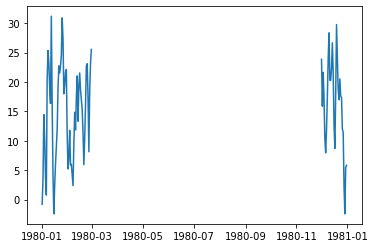

In [25]:
plt.plot(dc_resampled['time'],dc_resampled)

In [40]:
winter_selected_u=u_wind_700.isel(time=u_wind_700.time.dt.season.isin(['DJF']))
winter_selected_v=v_wind_700.isel(time=v_wind_700.time.dt.season.isin(['DJF']))

In [41]:
winter_selected_u

<xarray.DataArray 'U' (time: 15400, lat: 53, lon: 113)>
[92230600 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2022-02-28T18:00:00
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 48.5 49.0 49.5 50.0 50.5
    lev      float64 700.0
Attributes:
    standard_name:   eastward_wind
    long_name:       Eastward wind component
    units:           m/s
    fmissing_value:  1000000000000000.0
    vmax:            1000000000000000.0
    vmin:            -1000000000000000.0

In [54]:
winter_selected_u['time'].values

array(['1980-01-01T00:00:00.000000000', '1980-01-01T06:00:00.000000000',
       '1980-01-01T12:00:00.000000000', '1980-01-01T18:00:00.000000000',
       '1980-01-02T00:00:00.000000000', '1980-01-02T06:00:00.000000000',
       '1980-01-02T12:00:00.000000000', '1980-01-02T18:00:00.000000000',
       '1980-01-03T00:00:00.000000000', '1980-01-03T06:00:00.000000000',
       '1980-01-03T12:00:00.000000000', '1980-01-03T18:00:00.000000000',
       '1980-01-04T00:00:00.000000000', '1980-01-04T06:00:00.000000000',
       '1980-01-04T12:00:00.000000000', '1980-01-04T18:00:00.000000000',
       '1980-01-05T00:00:00.000000000', '1980-01-05T06:00:00.000000000',
       '1980-01-05T12:00:00.000000000', '1980-01-05T18:00:00.000000000',
       '1980-01-06T00:00:00.000000000', '1980-01-06T06:00:00.000000000',
       '1980-01-06T12:00:00.000000000', '1980-01-06T18:00:00.000000000',
       '1980-01-07T00:00:00.000000000', '1980-01-07T06:00:00.000000000',
       '1980-01-07T12:00:00.000000000', '1980-01-07

In [44]:
winter_selected_v

<xarray.DataArray 'V' (time: 15400, lat: 53, lon: 113)>
[92230600 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2022-02-28T18:00:00
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 48.5 49.0 49.5 50.0 50.5
    lev      float64 700.0
Attributes:
    standard_name:   northward_wind
    long_name:       Northward wind component
    units:           m/s
    fmissing_value:  1000000000000000.0
    vmax:            1000000000000000.0
    vmin:            -1000000000000000.0

In [56]:
u_wind_test=winter_selected_u.loc['1980-01-01':'1981-02-28']
#v_wind_test=winter_selected_v.loc['1980-01-01':'1982-02-28']

In [62]:
u_wind_test['time']

<xarray.DataArray 'time' (time: 600)>
array(['1980-01-01T00:00:00.000000000', '1980-01-01T06:00:00.000000000',
       '1980-01-01T12:00:00.000000000', ..., '1981-02-28T06:00:00.000000000',
       '1981-02-28T12:00:00.000000000', '1981-02-28T18:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 1981-02-28T18:00:00
    lev      float64 700.0
Attributes:
    standard_name:  time
    long_name:      time
    axis:           T

In [60]:
print(len(u_wind_test))

600


In [63]:
just_resampled=u_wind_test.resample(time='1D')

In [64]:
just_resampled

DataArrayResample, grouped over '__resample_dim__'
150 groups with labels 1980-01-01, ..., 1981-02-28.

In [71]:
just_resampled

AttributeError: 'DataArrayResample' object has no attribute 'values'

In [65]:
mean=just_resampled.mean(dim='time')

In [66]:
mean

<xarray.DataArray 'U' (time: 425, lat: 53, lon: 113)>
array([[[ 6.02007484e+00,  5.84575844e+00,  5.67276478e+00,
          5.49783039e+00,  5.42199326e+00,  5.40818691e+00,
          5.51691437e+00,  5.60785103e+00,  5.51493216e+00,
          5.17239237e+00,  4.86924887e+00,  4.57318878e+00,
          4.22924137e+00,  3.87732935e+00,  3.46326447e+00,
          2.97079849e+00,  2.27929544e+00,  1.42823911e+00,
          4.50109839e-01, -6.55266762e-01, -1.59695268e+00,
         -2.17565393e+00, -2.34122944e+00, -2.37722063e+00,
         -2.12405062e+00, -1.97877622e+00, -1.79387558e+00,
         -1.82742691e+00, -2.10510898e+00, -2.42138076e+00,
         -2.29637790e+00, -1.42674541e+00, -3.41195047e-01,
         -4.32467699e-01, -1.51114672e-01,  4.17185128e-01,
          7.27920771e-01,  1.43101048e+00,  2.13250446e+00,
          1.82380247e+00,  1.98573470e+00,  3.04742336e+00,
          5.16663742e+00,  6.37564659e+00,  6.71292686e+00,
          7.07415199e+00,  8.28133392e+00,  8.90137577e+00,
          9.76162434e+00,  1.04277201e+01,  1.10493975e+01,
          1.16308918e+01,  1.21853151e+01,  1.27824287e+01,
          1.33717670e+01,  1.40458679e+01,  1.47579918e+01,
          1.55122643e+01,  1.62893620e+01,  1.70801201e+01,
...
          9.52138615e+00,  8.96627426e+00,  8.31841469e+00,
          7.85443449e+00,  7.55926323e+00,  7.29303074e+00,
          7.23304367e+00,  7.20648575e+00,  7.34707403e+00,
          7.63778496e+00,  7.75990772e+00,  7.72789192e+00,
          7.66148472e+00,  7.64943218e+00,  7.80133820e+00,
          7.89708138e+00,  7.94620705e+00,  7.95050144e+00,
          7.90981388e+00,  7.74443674e+00,  7.46214247e+00,
          7.29906797e+00,  7.24975204e+00,  7.38390636e+00,
          7.79576921e+00,  8.31090260e+00,  8.85047913e+00,
          9.46509552e+00,  1.02480640e+01,  1.09803047e+01,
          1.14221888e+01,  1.17216454e+01,  1.21721716e+01,
          1.26667566e+01,  1.29039946e+01,  1.29995604e+01,
          1.28254223e+01,  1.23415709e+01,  1.16384859e+01,
          1.06475220e+01,  9.66862965e+00,  9.04780960e+00,
          8.80321884e+00,  8.60329533e+00,  8.66872406e+00,
          8.48840427e+00,  8.16764832e+00,  7.69998074e+00,
          6.98414230e+00,  5.95761681e+00,  4.86999035e+00,
          3.78535366e+00,  2.76401043e+00,  1.70550251e+00,
          5.01633167e-01, -8.02743673e-01, -2.04382586e+00,
         -3.31677365e+00, -3.65757108e+00]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 1981-02-28
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 48.5 49.0 49.5 50.0 50.5
    lev      float64 700.0

In [70]:
selected=mean.isel(time=mean.time.dt.season.isin(['DJF']))
selected

<xarray.DataArray 'U' (time: 150, lat: 53, lon: 113)>
array([[[ 6.02007484e+00,  5.84575844e+00,  5.67276478e+00,
          5.49783039e+00,  5.42199326e+00,  5.40818691e+00,
          5.51691437e+00,  5.60785103e+00,  5.51493216e+00,
          5.17239237e+00,  4.86924887e+00,  4.57318878e+00,
          4.22924137e+00,  3.87732935e+00,  3.46326447e+00,
          2.97079849e+00,  2.27929544e+00,  1.42823911e+00,
          4.50109839e-01, -6.55266762e-01, -1.59695268e+00,
         -2.17565393e+00, -2.34122944e+00, -2.37722063e+00,
         -2.12405062e+00, -1.97877622e+00, -1.79387558e+00,
         -1.82742691e+00, -2.10510898e+00, -2.42138076e+00,
         -2.29637790e+00, -1.42674541e+00, -3.41195047e-01,
         -4.32467699e-01, -1.51114672e-01,  4.17185128e-01,
          7.27920771e-01,  1.43101048e+00,  2.13250446e+00,
          1.82380247e+00,  1.98573470e+00,  3.04742336e+00,
          5.16663742e+00,  6.37564659e+00,  6.71292686e+00,
          7.07415199e+00,  8.28133392e+00,  8.90137577e+00,
          9.76162434e+00,  1.04277201e+01,  1.10493975e+01,
          1.16308918e+01,  1.21853151e+01,  1.27824287e+01,
          1.33717670e+01,  1.40458679e+01,  1.47579918e+01,
          1.55122643e+01,  1.62893620e+01,  1.70801201e+01,
...
          9.52138615e+00,  8.96627426e+00,  8.31841469e+00,
          7.85443449e+00,  7.55926323e+00,  7.29303074e+00,
          7.23304367e+00,  7.20648575e+00,  7.34707403e+00,
          7.63778496e+00,  7.75990772e+00,  7.72789192e+00,
          7.66148472e+00,  7.64943218e+00,  7.80133820e+00,
          7.89708138e+00,  7.94620705e+00,  7.95050144e+00,
          7.90981388e+00,  7.74443674e+00,  7.46214247e+00,
          7.29906797e+00,  7.24975204e+00,  7.38390636e+00,
          7.79576921e+00,  8.31090260e+00,  8.85047913e+00,
          9.46509552e+00,  1.02480640e+01,  1.09803047e+01,
          1.14221888e+01,  1.17216454e+01,  1.21721716e+01,
          1.26667566e+01,  1.29039946e+01,  1.29995604e+01,
          1.28254223e+01,  1.23415709e+01,  1.16384859e+01,
          1.06475220e+01,  9.66862965e+00,  9.04780960e+00,
          8.80321884e+00,  8.60329533e+00,  8.66872406e+00,
          8.48840427e+00,  8.16764832e+00,  7.69998074e+00,
          6.98414230e+00,  5.95761681e+00,  4.86999035e+00,
          3.78535366e+00,  2.76401043e+00,  1.70550251e+00,
          5.01633167e-01, -8.02743673e-01, -2.04382586e+00,
         -3.31677365e+00, -3.65757108e+00]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 1981-02-28
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 48.5 49.0 49.5 50.0 50.5
    lev      float64 700.0

In [67]:
mean['time'].values

array(['1980-01-01T00:00:00.000000000', '1980-01-02T00:00:00.000000000',
       '1980-01-03T00:00:00.000000000', '1980-01-04T00:00:00.000000000',
       '1980-01-05T00:00:00.000000000', '1980-01-06T00:00:00.000000000',
       '1980-01-07T00:00:00.000000000', '1980-01-08T00:00:00.000000000',
       '1980-01-09T00:00:00.000000000', '1980-01-10T00:00:00.000000000',
       '1980-01-11T00:00:00.000000000', '1980-01-12T00:00:00.000000000',
       '1980-01-13T00:00:00.000000000', '1980-01-14T00:00:00.000000000',
       '1980-01-15T00:00:00.000000000', '1980-01-16T00:00:00.000000000',
       '1980-01-17T00:00:00.000000000', '1980-01-18T00:00:00.000000000',
       '1980-01-19T00:00:00.000000000', '1980-01-20T00:00:00.000000000',
       '1980-01-21T00:00:00.000000000', '1980-01-22T00:00:00.000000000',
       '1980-01-23T00:00:00.000000000', '1980-01-24T00:00:00.000000000',
       '1980-01-25T00:00:00.000000000', '1980-01-26T00:00:00.000000000',
       '1980-01-27T00:00:00.000000000', '1980-01-28

In [48]:
u_resampled_shorter=u_wind_test.resample(time='1D').mean(dim='time')
#v_resampled_shorter=v_wind_test.resample(time='1D').mean(dim='time')

In [51]:
import sys
np.set_printoptions(threshold=sys.maxsize)

In [53]:
print(u_resampled_shorter['time'].values)

['1980-01-01T00:00:00.000000000' '1980-01-02T00:00:00.000000000'
 '1980-01-03T00:00:00.000000000' '1980-01-04T00:00:00.000000000'
 '1980-01-05T00:00:00.000000000' '1980-01-06T00:00:00.000000000'
 '1980-01-07T00:00:00.000000000' '1980-01-08T00:00:00.000000000'
 '1980-01-09T00:00:00.000000000' '1980-01-10T00:00:00.000000000'
 '1980-01-11T00:00:00.000000000' '1980-01-12T00:00:00.000000000'
 '1980-01-13T00:00:00.000000000' '1980-01-14T00:00:00.000000000'
 '1980-01-15T00:00:00.000000000' '1980-01-16T00:00:00.000000000'
 '1980-01-17T00:00:00.000000000' '1980-01-18T00:00:00.000000000'
 '1980-01-19T00:00:00.000000000' '1980-01-20T00:00:00.000000000'
 '1980-01-21T00:00:00.000000000' '1980-01-22T00:00:00.000000000'
 '1980-01-23T00:00:00.000000000' '1980-01-24T00:00:00.000000000'
 '1980-01-25T00:00:00.000000000' '1980-01-26T00:00:00.000000000'
 '1980-01-27T00:00:00.000000000' '1980-01-28T00:00:00.000000000'
 '1980-01-29T00:00:00.000000000' '1980-01-30T00:00:00.000000000'
 '1980-01-31T00:00:00.000

In [55]:
print(np.shape(u_resampled_shorter))

(790, 53, 113)


In [30]:
u_resampled=winter_selected_u.resample(time='1D').mean(dim='time')
v_resampled=winter_selected_v.resample(time='1D').mean(dim='time')

In [31]:
u_resampled.to_netcdf('/project/xprecip/merra2_ncfiles/winds/winds_morelevels_mean_9-20-22/winds_resampled/u_resampled.nc')

In [32]:
v_resampled.to_netcdf('/project/xprecip/merra2_ncfiles/winds/winds_morelevels_mean_9-20-22/winds_resampled/v_resampled.nc')

### Opening resampled files for 1 day mean u and v winds

In [16]:
f= '/project/xprecip/merra2_ncfiles/winds/winds_morelevels_mean_9-20-22/winds_resampled/u_resampled.nc'
u_wind_resampled=xr.open_dataset(f)
lon=u_wind_resampled['lon']
lat=u_wind_resampled['lat']
u_wind_resampled_vals=u_wind_resampled['U']

In [17]:
u_wind_resampled_vals

<xarray.DataArray 'U' (time: 15400, lat: 53, lon: 113)>
[92230600 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2022-02-28
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 48.5 49.0 49.5 50.0 50.5
    lev      float64 ...

In [18]:
dc_u=u_wind_resampled_vals.sel(lat=39,lon=-77,method='nearest')
dc_u

<xarray.DataArray 'U' (time: 15400)>
array([-0.810848,  3.576854, 14.442909, ..., 28.413773, 25.872211, 22.054348],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2022-02-28
    lon      float64 -76.88
    lat      float64 39.0
    lev      float64 700.0

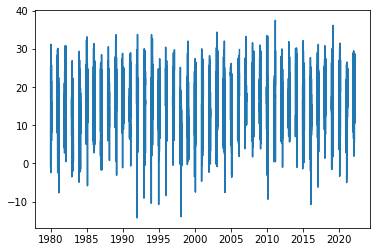

In [9]:
plt.plot(dc_u['time'],dc_u)

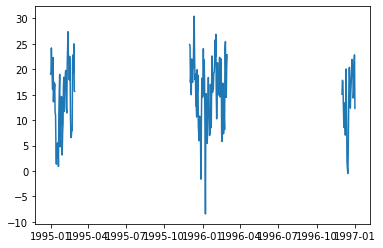

In [10]:
#just 2 years
two_years=dc_u.loc['1995-01-01':'1997-01-01']
plt.plot(two_years['time'],two_years)

In [11]:
#u_wind_resampled_vals['time'].values

In [19]:
f= '/project/xprecip/merra2_ncfiles/winds/winds_morelevels_mean_9-20-22/winds_resampled/v_resampled.nc'
v_wind_resampled=xr.open_dataset(f)
v_wind_resampled_vals=v_wind_resampled['V']

In [20]:
all_times=u_wind_resampled['time']
all_times

<xarray.DataArray 'time' (time: 15400)>
array(['1980-01-01T00:00:00.000000000', '1980-01-02T00:00:00.000000000',
       '1980-01-03T00:00:00.000000000', ..., '2022-02-26T00:00:00.000000000',
       '2022-02-27T00:00:00.000000000', '2022-02-28T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2022-02-28
    lev      float64 700.0

In [21]:
winter_u=u_wind_resampled_vals.isel(time=u_wind_resampled_vals.time.dt.season.isin(['DJF']))
winter_u #reduces time to daily data for winter 

<xarray.DataArray 'U' (time: 3850, lat: 53, lon: 113)>
[23057650 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2022-02-28
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 48.5 49.0 49.5 50.0 50.5
    lev      float64 700.0

In [22]:
winter_v=v_wind_resampled_vals.isel(time=v_wind_resampled_vals.time.dt.season.isin(['DJF']))
winter_v

<xarray.DataArray 'V' (time: 3850, lat: 53, lon: 113)>
[23057650 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2022-02-28
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 48.5 49.0 49.5 50.0 50.5
    lev      float64 ...

In [23]:
winter_u_shorter=winter_u.sel(time=slice('1980-01-01','1982-01-01'))
winter_v_shorter=winter_v.sel(time=slice('1980-01-01','1982-01-01'))
winter_u_shorter

<xarray.DataArray 'U' (time: 182, lat: 53, lon: 113)>
[1089998 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 1982-01-01
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 48.5 49.0 49.5 50.0 50.5
    lev      float64 700.0

In [9]:
yearly_groups=winter_u_shorter.groupby('time.year')
yearly_groups

DataArrayGroupBy, grouped over 'year'
3 groups with labels 1980, 1981, 1982.

In [10]:
shorter_times=winter_u_shorter['time']

In [11]:
u_wind_2d=[]
for i in range(len(winter_u_shorter)):
    u_wind_notime=winter_u_shorter[i,:,:]
    print(np.shape(u_wind_notime))
    u_wind_2d.append(u_wind_notime)
    

In [12]:
v_wind_2d=[]
for i in range(len(winter_v_shorter)):
    v_wind_notime=winter_v_shorter[i,:,:]
    v_wind_2d.append(v_wind_notime)
    

In [14]:
print(np.shape(u_wind_2d))

(182, 53, 113)


In [32]:
vort_saved=[]
for i in range(len(winter_u_shorter)):
    #print(i)
    u_wind_notime=winter_u_shorter[i,:,:].values
    #print(u_wind_notime)
    v_wind_notime=winter_v_shorter[i,:,:].values
    #print(v_wind_notime)
    vort_test=mg.hcurl(u_wind_notime,v_wind_notime,lat,lon)
    #print(np.nanmax(vort_test))
    vort_saved.append(vort_test)

Pystuff Error: scalar must have only 2 dimensions, but it has 3.


TypeError: unsupported operand type(s) for /: 'NoneType' and 'float'

In [22]:
vort_all=[]
for i in range(len(winter_u_shorter)):
    print(i)
    vort_test=mg.hcurl(u_wind_2d[i],v_wind_2d[i],lat,lon)
    #print(vort_test)
    vort_all.append(vort_test)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181


In [23]:
print(np.shape(vort_all))

(182, 53, 113)


In [24]:
vort_array_test=xr.DataArray(vort_all,dims=('time','lat','lon'),coords={'time':shorter_times,'lon':lon,'lat':lat})
vort_array_test#works as it should for prototype

<xarray.DataArray (time: 182, lat: 53, lon: 113)>
array([[[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,  1.30890419e-06,  3.49541935e-06, ...,
         -4.41596825e-06, -1.42332961e-06,             nan],
        [            nan,  2.08213482e-08,  2.41514356e-06, ...,
         -1.06879973e-05, -8.66722443e-06,             nan],
        ...,
        [            nan,  2.01564775e-05,  1.65932299e-05, ...,
         -1.68349118e-06, -5.30635443e-06,             nan],
        [            nan,  5.52212552e-06,  1.07246168e-05, ...,
         -5.64204197e-06,  1.62979060e-06,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan, -1.75928458e-05, -1.95659046e-05, ...,
          3.55621957e-06,  1.22836990e-05,             nan],
        [            nan, -1.87002228e-05, -1.95836372e-05, ...,
         -7.84361655e-07,  9.21853975e-06,             nan],
...
        [            nan,  3.25713642e-05,  1.31631235e-05, ...,
          3.68090941e-05,  3.95354181e-05,             nan],
        [            nan,  6.63407039e-06,  2.76960194e-05, ...,
          2.02699533e-05,  3.09778494e-05,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan, -2.54139477e-05, -2.50844336e-05, ...,
         -2.01896748e-05, -2.03802382e-05,             nan],
        [            nan, -2.83535751e-05, -2.76874526e-05, ...,
         -1.79117614e-05, -2.22785762e-05,             nan],
        ...,
        [            nan, -8.19166271e-07,  2.20684805e-06, ...,
         -2.01501356e-05, -2.44935334e-05,             nan],
        [            nan,  4.56191150e-07,  1.20960287e-05, ...,
         -1.96027879e-05, -1.62151191e-05,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]]])
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 1982-01-01
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 48.5 49.0 49.5 50.0 50.5

In [25]:
vort_array_test.to_netcdf('/project/xprecip/merra2_ncfiles/winds/winds_morelevels_mean_9-20-22/winds_resampled/vort_resampled_test.nc')

### Open computation and visuzlie to check:

In [18]:
f='/project/xprecip/merra2_ncfiles/winds/winds_morelevels_mean_9-20-22/winds_resampled/vort_resampled_test.nc'
DS=xr.open_dataset(f)
DS

<xarray.Dataset>
Dimensions:                        (lat: 53, lon: 113, time: 182)
Coordinates:
  * time                           (time) datetime64[ns] 1980-01-01 ... 1982-...
  * lon                            (lon) float64 -126.2 -125.6 ... -56.88 -56.25
  * lat                            (lat) float64 24.5 25.0 25.5 ... 50.0 50.5
Data variables:
    __xarray_dataarray_variable__  (time, lat, lon) float64 ...

In [19]:
vort_computed=DS['__xarray_dataarray_variable__']
vort_computed

<xarray.DataArray '__xarray_dataarray_variable__' (time: 182, lat: 53, lon: 113)>
[1089998 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 1982-01-01
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 48.5 49.0 49.5 50.0 50.5

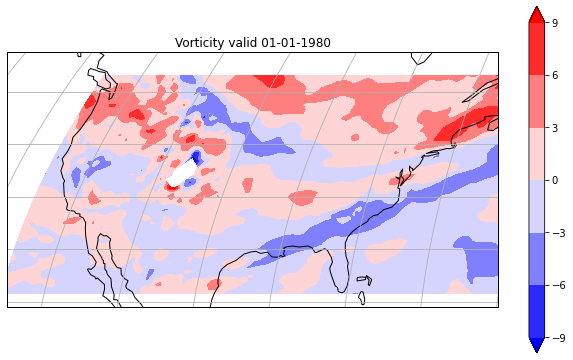

In [27]:
fig = plt.figure(figsize=(11,8.5))
ax=plt.axes(projection=ccrs.Robinson())
cs=ax.contourf(vort_computed['lon'], vort_computed['lat'], vort_computed[7,:,:]*100000,transform = ccrs.PlateCarree(),cmap='bwr',extend='both')
ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
cbar=plt.colorbar(cs, shrink=0.75)
plt.title('Vorticity valid 01-01-1980')
plt.savefig('/homes/areed29/CLIM997/summer22_research/vort_1day_test.png')

In [28]:
mean_vort_700=vort_computed.mean(dim='time')
mean_vort_700

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 53, lon: 113)>
array([[            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [            nan, -5.08385638e-06, -4.31066150e-06, ...,
        -1.36277252e-05, -1.36439789e-05,             nan],
       [            nan, -5.72857036e-06, -5.45581146e-06, ...,
        -1.34499694e-05, -1.33694890e-05,             nan],
       ...,
       [            nan,  4.42532109e-06, -5.26739509e-06, ...,
         1.27692378e-05,  9.62934905e-06,             nan],
       [            nan, -1.20323692e-05, -5.00269117e-06, ...,
         7.70568203e-06,  1.15767832e-05,             nan],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan]])
Coordinates:
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 48.5 49.0 49.5 50.0 50.5

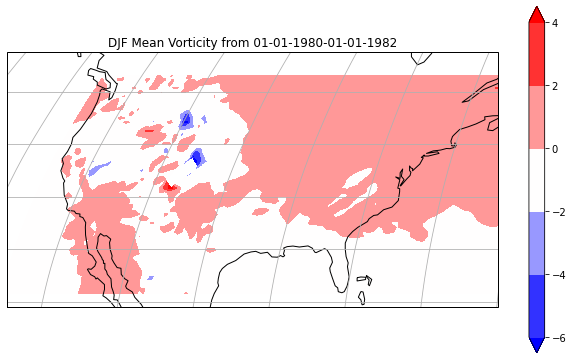

In [30]:
fig = plt.figure(figsize=(11,8.5))
ax=plt.axes(projection=ccrs.Robinson())
cs=ax.contourf(mean_vort_700['lon'], mean_vort_700['lat'], mean_vort_700*100000,transform = ccrs.PlateCarree(),cmap='bwr',extend='both')
ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
cbar=plt.colorbar(cs, shrink=0.75)
plt.title('DJF Mean Vorticity from 01-01-1980-01-01-1982')
plt.savefig('/homes/areed29/CLIM997/summer22_research/DJF_mean_vort_2years_test.png')

In [68]:
#vort_all

In [42]:
#winter_u['time'].values

In [47]:
#shorter_times=all_times[0:2]
#shorter_times

In [11]:
u_wind_2d=[]
for i in range(len(u_wind_resampled_vals)):
    u_wind_notime=u_wind_resampled_vals[i,:,:]
    u_wind_2d.append(u_wind_notime)
    

In [12]:
v_wind_2d=[]
for i in range(len(v_wind_resampled_vals)):
    v_wind_notime=v_wind_resampled_vals[i,:,:]
    v_wind_2d.append(v_wind_notime)
    

In [8]:
v_wind_resampled_vals

<xarray.DataArray 'V' (time: 15400, lat: 53, lon: 113)>
[92230600 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2022-02-28
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 48.5 49.0 49.5 50.0 50.5
    lev      float64 ...

In [45]:
#dummy_array=u_wind_resampled-u_wind_resampled
#dummy_array

In [46]:
#dummy_array_allnans=xr.full_like(dummy_array,np.nan)
#dummy_array_allnans #this will be used to store vorticity values at the end

In [13]:
u_wind_resampled_small=u_wind_2d[0:2]
v_wind_resampled_small=v_wind_2d[0:2]

In [23]:
print(np.shape(u_wind_resampled_small))

(2, 53, 113)


In [67]:
dummy_array=u_wind_resampled_small-u_wind_resampled_small
dummy_array

<xarray.DataArray 'U' (time: 2, lat: 53, lon: 113)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 48.5 49.0 49.5 50.0 50.5
    lev      float64 700.0

In [77]:
dummy_array_allnans=xr.full_like(dummy_array,np.nan)
dummy_array_allnans #this will be used to store vorticity values at the end

<xarray.DataArray 'U' (time: 2, lat: 53, lon: 113)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 48.5 49.0 49.5 50.0 50.5
    lev      float64 700.0

In [78]:
time_dimension=dummy_array_allnans['time']
time_dimension

<xarray.DataArray 'time' (time: 2)>
array(['1980-01-01T00:00:00.000000000', '1980-01-02T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02
    lev      float64 700.0

In [15]:
#vorticity computation for shorter time step
vort_full=[]
for i in range(len(u_wind_resampled_small)):
    vort=mg.hcurl(u_wind_resampled_small[i],v_wind_resampled_small[i],lat,lon)
    vort_full.append(vort)

In [16]:
vort_array=xr.DataArray(vort_full,dims=('time','lat','lon'),coords={'time':shorter_times,'lon':lon,'lat':lat})
vort_array#works as it should for prototype

<xarray.DataArray (time: 2, lat: 53, lon: 113)>
array([[[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,  1.30890419e-06,  3.49541935e-06, ...,
         -4.41596825e-06, -1.42332961e-06,             nan],
        [            nan,  2.08213482e-08,  2.41514356e-06, ...,
         -1.06879973e-05, -8.66722443e-06,             nan],
        ...,
        [            nan,  2.01564775e-05,  1.65932299e-05, ...,
         -1.68349118e-06, -5.30635443e-06,             nan],
        [            nan,  5.52212552e-06,  1.07246168e-05, ...,
         -5.64204197e-06,  1.62979060e-06,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan, -1.75928458e-05, -1.95659046e-05, ...,
          3.55621957e-06,  1.22836990e-05,             nan],
        [            nan, -1.87002228e-05, -1.95836372e-05, ...,
         -7.84361655e-07,  9.21853975e-06,             nan],
        ...,
        [            nan,  3.09133979e-05,  1.32811420e-05, ...,
         -1.31272058e-05, -1.36598507e-05,             nan],
        [            nan, -3.91312495e-06,  1.62502222e-05, ...,
         -1.66836611e-05, -3.79684446e-06,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]]])
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 48.5 49.0 49.5 50.0 50.5

In [17]:
dc_vort=vort_array.sel(lat=39,lon=-77,method='nearest')
dc_vort

<xarray.DataArray (time: 2)>
array([-3.77754536e-05, -3.81091147e-05])
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02
    lon      float64 -76.88
    lat      float64 39.0

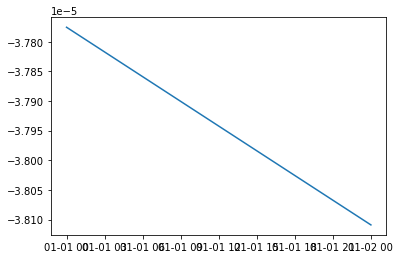

In [ ]:
#vorticity computation for full time step
vort_full=[]
for i in range(len(u_wind_2d)):
    vort=mg.hcurl(u_wind_2d[i],v_wind_2d[i],lat,lon)
    vort_full.append(vort)

In [ ]:
vort_array_full=xr.DataArray(vort_full,dims=('time','lat','lon'),coords={'time':all_times,'lon':lon,'lat':lat})
vort_array#works as it should for prototype

In [ ]:
vort_array.to_netcdf('/project/xprecip/merra2_ncfiles/winds/winds_morelevels_mean_9-20-22/winds_resampled/vort_resampled_9-26-22.nc')

In [25]:
vort_all=[]
for i in range(0,len(u_wind_test),4):
    print(i)
    #u_wind_mean=np.nanmean(u_wind_test[:,:,:])
    #v_wind_mean=np.nanmean(v_wind_test[:,:,:])
    vort=mg.hcurl(u_wind_test[i,:,:],v_wind_test[i,:,:],lat,lon)
    vort_all.append(vort)


0
4
8
12
16
20
24
28
32
36
40
44
48
52
56


'\n    vort=mg.hcurl(u_wind_test[i,:,:],v_wind_test[i,:,:],lat,lon)\n    vort_all.append(vort)\n'

In [24]:
u_wind_mean

11.659396

In [ ]:
vort=mg.hcurl(u_wind_test,v_wind_test)

### Full time period

In [33]:
all_times=winter_u['time']
all_times

<xarray.DataArray 'time' (time: 3850)>
array(['1980-01-01T00:00:00.000000000', '1980-01-02T00:00:00.000000000',
       '1980-01-03T00:00:00.000000000', ..., '2022-02-26T00:00:00.000000000',
       '2022-02-27T00:00:00.000000000', '2022-02-28T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2022-02-28
    lev      float64 700.0

In [34]:
vort_full=[]
for i in range(len(winter_u)):
    #print(i)
    u_wind_notime_full=winter_u[i,:,:].values
    #print(u_wind_notime)
    v_wind_notime_full=winter_v[i,:,:].values
    #print(v_wind_notime)
    vort=mg.hcurl(u_wind_notime_full,v_wind_notime_full,lat,lon)
    #print(np.nanmax(vort_test))
    vort_full.append(vort)

In [35]:
vort_array_full=xr.DataArray(vort_full,dims=('time','lat','lon'),coords={'time':all_times,'lon':lon,'lat':lat})
vort_array_full#works as it should for prototype

<xarray.DataArray (time: 3850, lat: 53, lon: 113)>
array([[[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,  1.30890419e-06,  3.49541935e-06, ...,
         -4.41596825e-06, -1.42332961e-06,             nan],
        [            nan,  2.08213482e-08,  2.41514356e-06, ...,
         -1.06879973e-05, -8.66722443e-06,             nan],
        ...,
        [            nan,  2.01564775e-05,  1.65932299e-05, ...,
         -1.68349118e-06, -5.30635443e-06,             nan],
        [            nan,  5.52212552e-06,  1.07246168e-05, ...,
         -5.64204197e-06,  1.62979060e-06,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan, -1.75928458e-05, -1.95659046e-05, ...,
          3.55621957e-06,  1.22836990e-05,             nan],
        [            nan, -1.87002228e-05, -1.95836372e-05, ...,
         -7.84361655e-07,  9.21853975e-06,             nan],
...
        [            nan,  3.31449125e-05,  3.72406903e-05, ...,
          7.55036418e-06, -4.33514194e-06,             nan],
        [            nan,  2.03106799e-05,  3.01378576e-05, ...,
         -6.24384069e-06,  1.03120728e-06,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,  7.00125643e-06, -1.94617585e-06, ...,
         -5.95971889e-06, -8.45433461e-06,             nan],
        [            nan, -2.53211962e-06, -7.59600044e-06, ...,
         -6.46385676e-06, -4.61515022e-06,             nan],
        ...,
        [            nan,  3.25610990e-05,  2.74541581e-05, ...,
         -2.85352112e-06,  7.66185760e-06,             nan],
        [            nan,  3.60006653e-06,  2.58896125e-05, ...,
          5.82201894e-06,  9.00972629e-06,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]]])
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2022-02-28
  * lon      (lon) float64 -126.2 -125.6 -125.0 -124.4 ... -57.5 -56.88 -56.25
  * lat      (lat) float64 24.5 25.0 25.5 26.0 26.5 ... 48.5 49.0 49.5 50.0 50.5

In [36]:
vort_array_full.to_netcdf('/project/xprecip/merra2_ncfiles/winds/winds_morelevels_mean_9-20-22/winds_resampled/vort_daily_resampled_full_9-27-22.nc')